1. Load the train and validation data

In [ ]:
# All the code lines in this cell are taken from Reference [4]

import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader


# train and validation data directory
train_data_dir = "images/images/train/"
validation_data_dir = "images/images/validation/"


# load the train and validation data
train_dataset = ImageFolder(train_data_dir,transform = transforms.Compose([
                transforms.ToTensor()
]))
validation_dataset = ImageFolder(validation_data_dir,transforms.Compose([
                transforms.ToTensor()
]))


# load the train and validation into batches.
train_dl = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 4)

# Few changes (batch_size, shuffle = False) were made to val_dl object by referring to Reference[1]
val_dl = DataLoader(validation_dataset, batch_size = 128, shuffle = False, num_workers = 4)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


2. Define the Convolutional Neural Network (CNN)

In [ ]:
# All the code lines in this cell are taken from Reference [1]

import torch.nn as nn # basic building block for neural networks
import torch.nn.functional as F # import convolution functions like Relu

class Net(nn.Module):
# Models a simple Convolutional Neural Network
	
    def __init__(self):
# initialize the network 
        super(Net, self).__init__() 

# The parameters of Conv2d and Linear layers are modified slightly from the original code.

# 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
    
# Max pooling over a (2, 2) window
        self.pool = nn.MaxPool2d(2, 2)
         
        self.fc1 = nn.Linear(64 * 10 * 10, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 7)

    def forward(self, x):
# the forward propagation algorithm
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

# The parameters of view are modified slightly from the original code.        
        x = x.view(-1, 64 * 10 * 10)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6400, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=7, bias=True)
)


3. Define the loss function and optimizer

In [ ]:
# All the code lines in this cell are taken from Reference [1]

import torch.optim as optim # optimizer

criterion = nn.CrossEntropyLoss()

# 'lr' value is modified from the original code.
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)

4. Train the model on the train data

In [ ]:
# The below code lines are taken from Reference [1]
train_losses=[]
train_accu=[]

# 'Number of epochs'is modified from the original code.
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    total = 0
    correct = 0
    for i, data in enumerate(train_dl, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# The below code lines are taken from Reference [5]
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
       
        train_loss=running_loss/len(train_dl)
        accu=100.*correct/total
   
        train_accu.append(accu)
        train_losses.append(train_loss)
        
print('\nLoss for train dataset : %.3f | Accuracy for train dataset : %.3f'%(train_loss,accu))


Loss for train dataset : 1.108 | Accuracy for train dataset : 58.190


5. Test the model on the validation data

In [ ]:
# The below code lines are taken from Reference [1]
# 'Number of epochs' is modified from the original code.

for epoch in range(10):
    
    eval_losses=[]
    eval_accu=[]
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_dl:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

# The below code lines are taken from Reference [5]
            test_loss=running_loss/len(val_dl)
            accu=100.*correct/total
            
            eval_losses.append(test_loss)
            eval_accu.append(accu)

print('\nLoss for validation dataset : %.3f | Accuracy for validation dataset : %.3f'%(test_loss,accu))


Loss for validation dataset : 4.470 | Accuracy for validation dataset : 50.863


Plotting the Accuracy and Loss for Train and Validation data

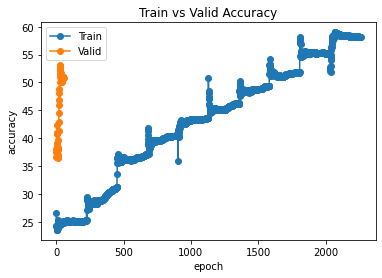

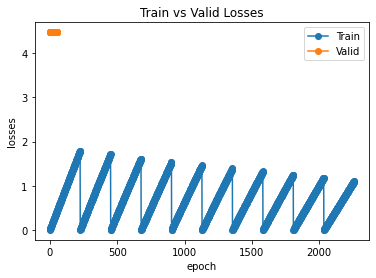

In [ ]:
# All the code lines in this cell are taken from Reference [5]

import matplotlib.pyplot as plt

# Plotting a line graph for Accuracy
plt.plot(train_accu,'-o')
plt.plot(eval_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Accuracy')
 
plt.show()
    
# Plotting a line graph for Loss         
plt.plot(train_losses,'-o')
plt.plot(eval_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')
 
plt.show()